In [1]:
#Libraries

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 1. Data Description # Goal

# We have a data frame from a marketing customer analysis with information on the clients of a insurance company
# The file contains different kinds of info regarding pretty much everything related to the insurance claimns: from income info to the vehicule specifics
# The goal is to clean and analyse this data and, at the end, create a model to predict the ´total claim amout´of the customers

In [3]:
# 2 - Getting Data, Read the .csv file.
df_customers = pd.read_excel("/Users/giulianamiranda/Documents/Labs/lab-customer-analysis-round-2/files_for_lab/excel_files/marketing_customer_analysis.xlsx")


In [4]:
df_customers

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [5]:
# 3 - Cleaning/Wrangling/EDA
# Change headers names

cols = []

for a in range(len(df_customers.columns)):
    cols.append(df_customers.columns[a].lower().replace(' ', '_'))
    
df_customers.columns = cols

df_customers.columns




Index(['unnamed:_0', 'customer', 'state', 'customer_lifetime_value',
       'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
       'vehicle_type'],
      dtype='object')

In [6]:
# Deal with NaN values 
df_customers.shape
df_customers.isnull().sum()

unnamed:_0                          0
customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [7]:
# Deal with NaN values 
# Considering that the 'vehicle_type' columns has over 50% of NaNs, I decided to drop it upfront
# The other empty values were usually related, with missing data usually appearing in more than one column on the same row
# For that reason, and because it was less than 6% of the data, I decided to drop all the NaN

df_customers = df_customers.drop(['vehicle_type'], axis=1)

# Drop rows with NaN values
df_customers = df_customers.dropna()


In [8]:
df_customers.isnull().sum()

unnamed:_0                       0
customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [9]:
# Categorical Features

# Select categorical columns
categoricals = df_customers.select_dtypes(include=[object])
categoricals


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
6,IW72280,California,No,Basic,Doctor,Employed,F,Urban,Married,Corporate Auto,Corporate L2,Offer2,Branch,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,SU71163,Arizona,No,Basic,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer2,Branch,Two-Door Car,Medsize
10904,QI63521,Nevada,No,Basic,High School or Below,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Luxury SUV,Medsize
10906,KX53892,Oregon,No,Basic,College,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize
10907,TL39050,Arizona,No,Extended,Bachelor,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize


In [10]:
numerical = df_customers.select_dtypes(include=[np.number])
numerical

numerical

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
6,6,5035.035257,37405,63,8.0,99,3.0,4,287.556107
...,...,...,...,...,...,...,...,...,...
10903,10903,2771.663013,59855,74,30.0,82,4.0,1,355.200000
10904,10904,19228.463620,0,187,14.0,32,0.0,2,897.600000
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996


In [11]:
# Exploration
print("The categorical dtypes: ", categoricals.dtypes)
print("Categoricals shape: ", categoricals.shape)
print("The numerical dtypes: ", numerical.dtypes)
print("Categoricals shape: ", numerical.shape)


The categorical dtypes:  customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object
Categoricals shape:  (9134, 15)
The numerical dtypes:  unnamed:_0                         int64
customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim          float64
months_since_policy_inception      int64
number_of_open_complaints        float64
number_of_policies                 int64
total_claim_amount               float64
dtype: object
Categoricals shape:  (9134, 9)


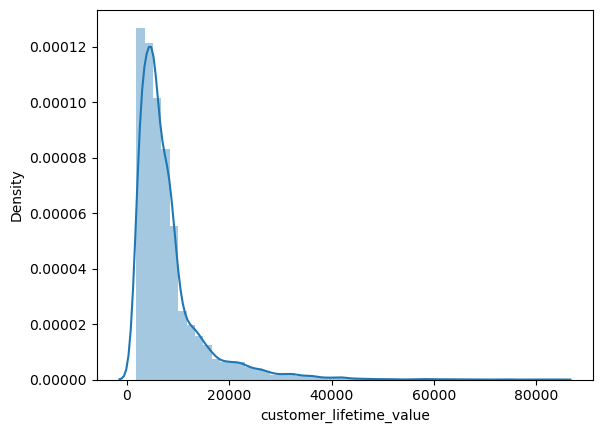

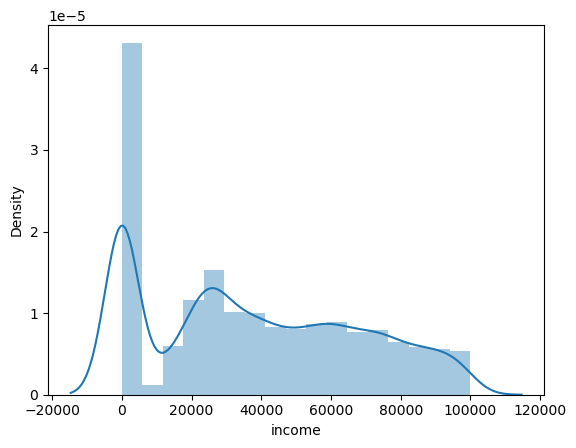

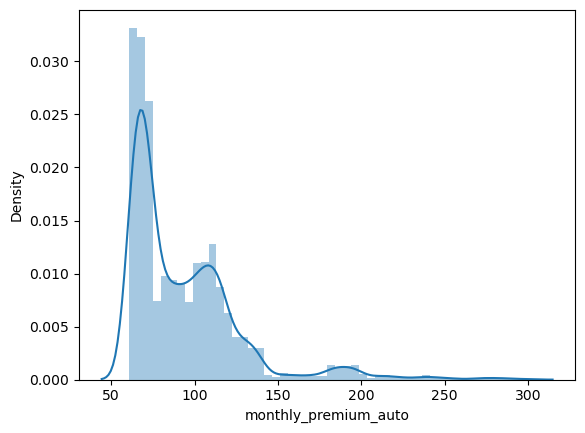

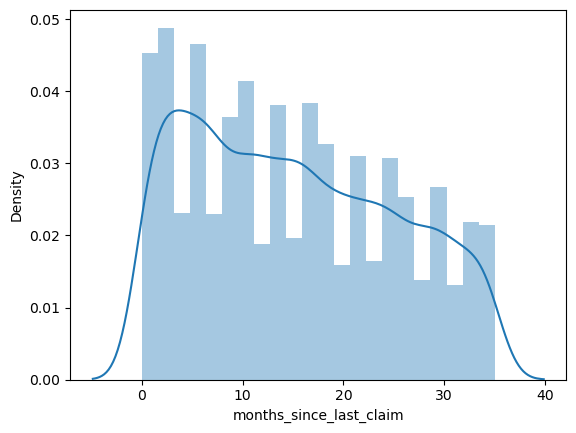

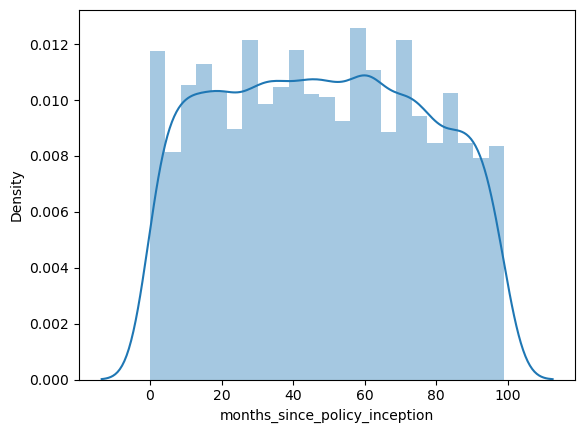

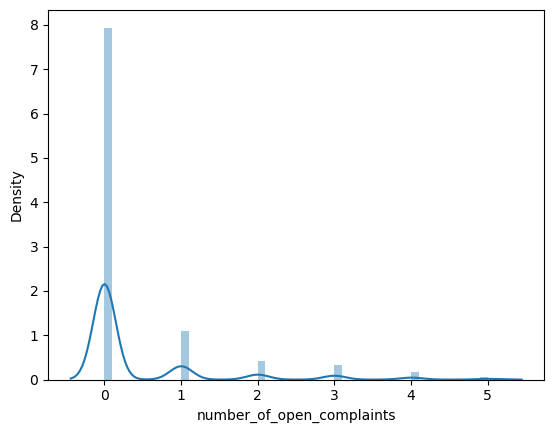

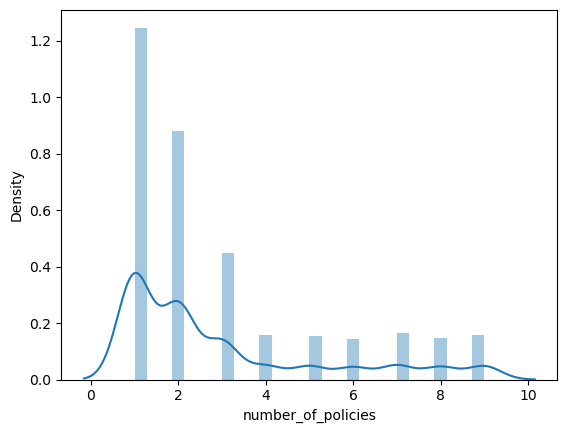

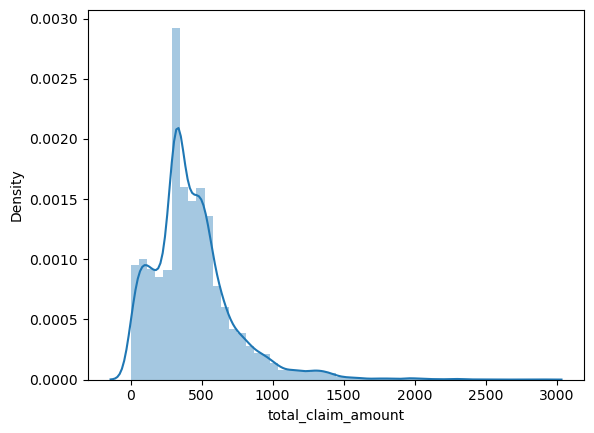

In [12]:
# Exploration

sns.distplot(numerical['customer_lifetime_value'])
plt.show()

sns.distplot(numerical['income'])
plt.show()

sns.distplot(numerical['monthly_premium_auto'])
plt.show()

sns.distplot(numerical['months_since_last_claim'])
plt.show()

sns.distplot(numerical['months_since_policy_inception'])
plt.show()

sns.distplot(numerical['number_of_open_complaints'])
plt.show()

sns.distplot(numerical['number_of_policies'])
plt.show()

sns.distplot(numerical['total_claim_amount'])
plt.show()


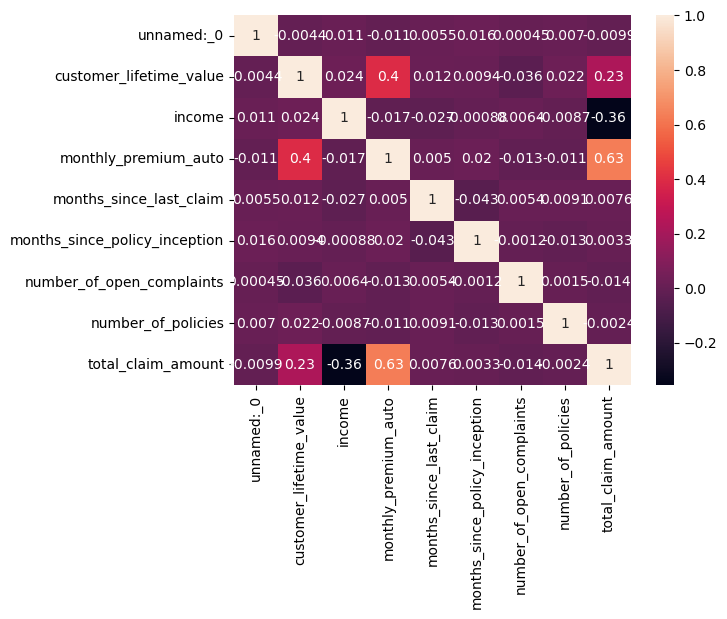

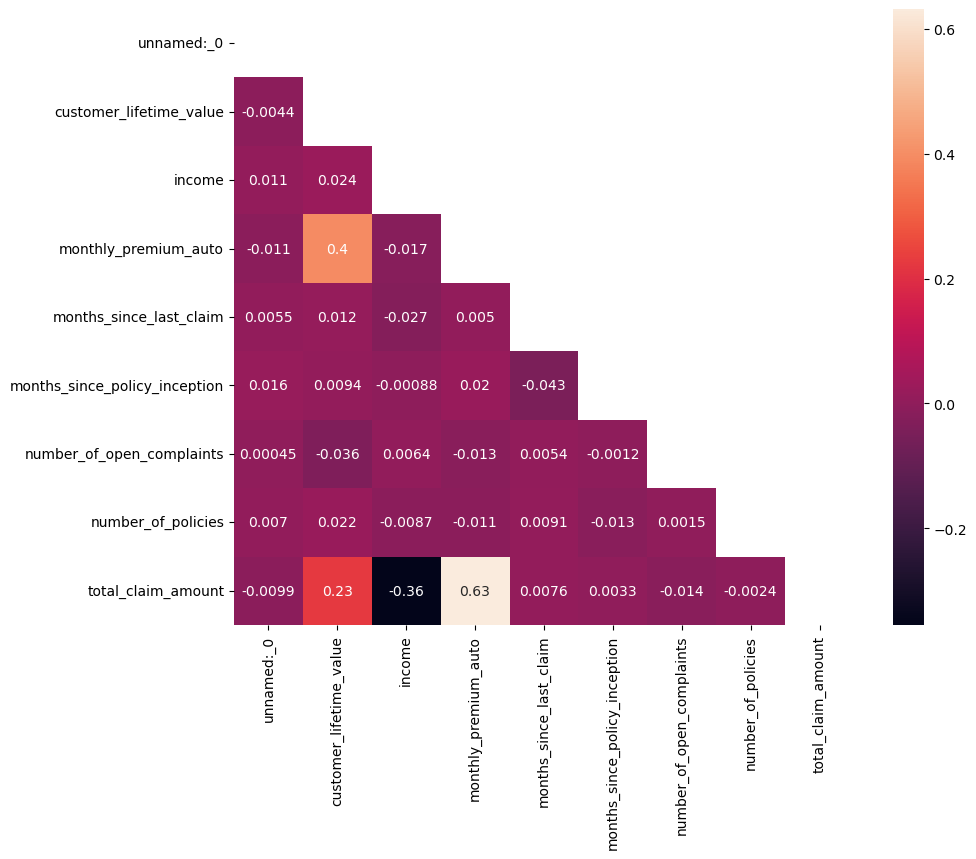

In [13]:
# Exploration

correlations_matrix = numerical.corr()

sns.heatmap(correlations_matrix, annot=True)
plt.show()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True # don't include if you think it will confuse the students right now
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()




In [14]:
# Processing Data - Dealing with outliers 

# Normalization

scaler = MinMaxScaler() 
normalized_df = scaler.fit_transform(numerical) 
normalized_df = pd.DataFrame(normalized_df, columns = numerical.columns)
normalized_df





,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0.000000,0.035752,0.480381,0.000000,0.200000,0.525253,0.0,1.000,0.101171
1,0.000092,0.004059,0.000000,0.012658,0.085714,0.262626,0.0,0.000,0.257445
2,0.000183,0.160264,0.221432,0.164557,0.971429,0.313131,0.0,0.125,0.165875
3,0.000275,0.250953,0.490873,0.151899,0.285714,0.030303,0.0,0.125,0.167263
4,0.000550,0.038525,0.374121,0.008439,0.228571,1.000000,0.6,0.375,0.099358
...,...,...,...,...,...,...,...,...,...
9129,0.999542,0.010729,0.598664,0.054852,0.857143,0.828283,0.8,0.000,0.122739
9130,0.999633,0.212833,0.000000,0.531646,0.400000,0.323232,0.0,0.125,0.310217
9131,0.999817,0.041281,0.611576,0.016878,0.200000,0.686869,0.0,0.625,0.094333
9132,0.999908,0.270122,0.398446,0.590717,0.314286,0.636364,0.0,0.125,0.131763


In [15]:
# Encoding Categorical Data

# I decided to drop the customers columns because it doesn't add much information, but creates 
# litteraly thousands of columns

hot_categoricals = pd.get_dummies(categoricals.drop(['customer'], axis = 1), drop_first = True)
hot_categoricals


,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,0,0,1,0,1,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
6,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10903,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,1,0
10904,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
10906,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
10907,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [16]:
# Splitting into train set and test set

concat = pd.merge(numerical, hot_categoricals, left_index=True, right_index=True)
concat

Y = concat['total_claim_amount']
X = concat.drop(['total_claim_amount'], axis=1) 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)



In [17]:
lm = linear_model.LinearRegression()
model = lm.fit(X,Y)
model.score(X,Y)
predictions = lm.predict(X_test) 




In [18]:
# 6 - Model Validation R2. MSE. RMSE. MAE
print("R2 value is = ", round(r2_score(Y_test, predictions), 2))
print("The intercept of the model is = ", lm.intercept_)
print("The coefficients of the models are: ", lm.coef_)

R2 value is =  0.78
The intercept of the model is =  -344.5853666172902
The coefficients of the models are:  [ 2.95631653e-04 -1.10831669e-04 -2.64985311e-04  5.14512891e+00
  2.73841475e-01  3.79378411e-03 -1.62898931e+00  6.71414930e-01
  3.47999854e+00  4.33946099e+00 -1.18379000e+00  5.19640138e+00
 -2.34143320e+01 -1.37450805e+01 -8.57960754e+00 -6.37857940e+00
 -1.47842837e+01  1.10578378e+01 -1.01780854e+01 -8.42232827e+00
  1.59112637e+01 -3.79350412e+00  6.48420749e+01  1.39527405e+01
  3.77903726e+02  2.20022708e+02 -7.67477336e+00  6.18264256e+01
  1.52276708e+00  1.42101838e+01 -3.40260193e+00  8.60563201e-01
  5.30358997e+00 -1.84400640e+00 -1.93681650e+00  3.36130071e+01
 -7.37886709e+00 -1.20239562e+01  1.86257815e+01  1.06439340e+01
  8.94813802e+00  1.37986616e+00 -2.18927133e+00  9.50648292e-01
  3.25577841e+01  1.89893006e+00 -1.43081559e+01 -2.53896126e+01
  7.14091610e-02 -7.67557169e+00  1.00181244e+00]


01 - Problem (case study)
Data Description.
Goal.
02 - Getting Data
Read the .csv file.
03 - Cleaning/Wrangling/EDA
Change headers names.
Deal with NaN values.
Categorical Features.
Numerical Features.
Exploration.
04 - Processing Data
Dealing with outliers.
Normalization.
Encoding Categorical Data.
Splitting into train set and test set.
05 - Modeling
Apply model.
06 - Model Validation
R2.
MSE.
RMSE.
MAE.
07 - Reporting
Present results.

In [19]:
# The model has a r2 of 0.78. It means it can be improved. 
# Further analysis of the data could hepl improve it, such as a better dealing with the multicollinearity shown 
# in the matrix
